In [339]:
import pandas as pd

In [340]:
df_train = pd.read_csv('data/twitter/train.csv')
df_test = pd.read_csv('data/twitter/test.csv')

In [341]:
df_train.head(50)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [342]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [343]:
from string import punctuation
from stop_words import get_stop_words
from pymorphy2 import MorphAnalyzer
import re

In [344]:
sw = set(get_stop_words("en"))
exclude = set(punctuation)
morpher = MorphAnalyzer()

def clean_text(text):
    text = re.sub(r'@\w+', '', text) # @names
    text = re.sub(r'#\w+', '', text) # hashtags
    text = re.sub(r'https?://\S+', '', text) # links
    text = [morpher.parse(word)[0].normal_form for word in text.split() ] # exceptions, morphers ## if word not in sw

    return ' '.join(text)

df_train['tweet'] = df_train['tweet'].apply(clean_text)
df_test['tweet'] = df_test['tweet'].apply(clean_text)

In [345]:
print(df_train.size)
df_train.head(20)

95886


,id,label,tweet
0,1,0,when a father is dysfunctional and is so selfi...
1,2,0,thanks for credit i can't use cause they don't...
2,3,0,bihday your majesty
3,4,0,i love u take with u all the time in urð±!!!...
4,5,0,factsguide: society now
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! â¦
9,10,0,welcome here ! i'm it's so !


In [346]:
df_test.head(20)

,id,tweet
0,31963,to find ¦
1,31964,want everyone to see the new â  â and he...
2,31965,safe ways to heal your !! !!
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd to my amazing, hilarious eli ahmir! uncle ..."
5,31968,choose to be :)
6,31969,something inside me dies ð¦ð¿â¨ eyes ness ¦
7,31970,¤ï¸ ¤ï¸â¤ï¸â¤ï¸â¤ï¸ !!!
8,31971,i will never understand why my dad left me whe...
9,31972,mannaepicure ¦


In [347]:
train_corpus = " ".join(df_train['tweet'])

In [348]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

tokens = word_tokenize(train_corpus)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grayni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [349]:
tokens_filtered = [word for word in tokens if word.isalnum()]

In [350]:
max_words = 100
max_len = 100
num_classes = 1

# Training
epochs = 20
batch_size = 256

In [351]:
from nltk.probability import FreqDist
dist = FreqDist(tokens_filtered)
tokens_filtered_top = [pair[0] for pair in dist.most_common(max_words-1)]

In [352]:
tokens_filtered_top[:10]

['the', 'to', 'i', 'a', 'you', 'and', 'in', 'for', 'is', 'of']

In [353]:
vocabulary = {v: k for k, v in dict(enumerate(tokens_filtered_top, 1)).items()}

In [354]:
import numpy as np
import nltk
from nltk.tokenize import ToktokTokenizer
def text_to_sequence(text, maxlen):
    result = []
    tokens = word_tokenize(text.lower())
    tokens_filtered = [word for word in tokens if word.isalnum()]
    for word in tokens_filtered:
        if word in vocabulary:
            result.append(vocabulary[word])
    padding = [0]*(maxlen-len(result))
    return padding + result[-maxlen:]

In [355]:
x_train = np.asarray([text_to_sequence(text, max_len) for text in df_train["tweet"]], dtype=np.int32)
x_test = np.asarray([text_to_sequence(text, max_len) for text in df_test["tweet"]], dtype=np.int32)

In [356]:
x_train.shape

(31962, 100)

In [357]:
x_test[1]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 66,  2, 60,  1, 48,  6, 90])

In [358]:
import random
import torch
import torch.nn as nn
import torch.nn.functional as F

seed = 0

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [359]:
class Net(nn.Module):
    def __init__(self, vocab_size=7000, embedding_dim = 150, out_channel = 150, num_classes = 1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv_1 = nn.Conv1d(embedding_dim, out_channel, kernel_size=2)
        self.conv_2 = nn.Conv1d(embedding_dim, out_channel, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
        self.relu = nn.ReLU()
        self.linear_1 = nn.Linear(out_channel, out_channel // 2)
        self.linear_2 = nn.Linear(out_channel // 2, num_classes)

    def forward(self, x):
        output = self.embedding(x)
        output = output.permute(0, 2, 1)
        output = self.conv_1(output)
        output = self.relu(output)
        output = self.pool(output)

        # output = self.conv_2(output)
        # output = self.relu(output)
        # output = self.pool(output)
        output = torch.max(output, dim=2).values
        output = self.linear_1(output)
        output = self.relu(output)
        output = self.linear_2(output)
        output = F.sigmoid(output)

        return output

In [360]:
from torch.utils.data import DataLoader, Dataset

class DataWrapper(Dataset):
    def __init__(self, data, target=None, transform=None):
        self.data = torch.from_numpy(data).long()
        if target is not None:
            self.target = torch.from_numpy(target).long()
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]

        if self.transform:
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)

In [361]:
model = Net(vocab_size=max_words)

print(model)
print("Parameters:", sum([param.nelement() for param in model.parameters()]))

model.train()
th = 0.5
#model = model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
criterion = nn.BCELoss()


train_dataset = DataWrapper(x_train, df_train['label'].values)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

train_loss_history = []

for epoch in range(epochs):
    running_items, running_rights = 0.0, 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        optimizer.zero_grad()
        outputs = model(inputs)

        # compute gradient and do SGD step
        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()

        loss = loss.item()
        running_items += len(labels)
        pred_labels = torch.squeeze((outputs > th).int())
        running_rights += (labels == pred_labels).sum()

    model.eval()

    print(f'Epoch [{epoch+1}/{epochs}] ' \
          f'Loss: {loss:.3f} ' \
          f'Acc: {running_rights / running_items:.3f}', end='\n')

    running_loss, running_items, running_rights = 0.0, 0.0, 0.0
    train_loss_history.append(loss)

Net(
  (embedding): Embedding(100, 150)
  (conv_1): Conv1d(150, 150, kernel_size=(2,), stride=(1,))
  (conv_2): Conv1d(150, 150, kernel_size=(3,), stride=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (linear_1): Linear(in_features=150, out_features=75, bias=True)
  (linear_2): Linear(in_features=75, out_features=1, bias=True)
)
Parameters: 139201
Epoch [1/20] Loss: 0.287 Acc: 0.902
Epoch [2/20] Loss: 0.321 Acc: 0.930
Epoch [3/20] Loss: 0.251 Acc: 0.930
Epoch [4/20] Loss: 0.225 Acc: 0.930
Epoch [5/20] Loss: 0.258 Acc: 0.930
Epoch [6/20] Loss: 0.246 Acc: 0.930
Epoch [7/20] Loss: 0.250 Acc: 0.930
Epoch [8/20] Loss: 0.259 Acc: 0.930
Epoch [9/20] Loss: 0.309 Acc: 0.930
Epoch [10/20] Loss: 0.259 Acc: 0.930
Epoch [11/20] Loss: 0.245 Acc: 0.930
Epoch [12/20] Loss: 0.241 Acc: 0.930
Epoch [13/20] Loss: 0.222 Acc: 0.930
Epoch [14/20] Loss: 0.235 Acc: 0.930
Epoch [15/20] Loss: 0.225 Acc: 0.930
Epoch [16/20] Loss: 0.220 Acc: 0.930
Epoc

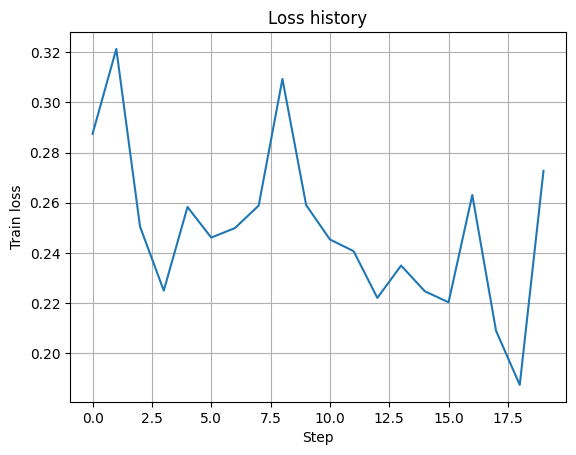

In [362]:
import matplotlib.pyplot as plt

plt.title('Loss history')
plt.grid(True)
plt.ylabel('Train loss')
plt.xlabel('Step')
plt.plot(train_loss_history);